In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('heart.csv')

# **Exploring the dataset**

In [4]:
# Returns number of rows and columns of the dataset
df.shape

(303, 14)

In [5]:
# Returns an object with all of the column headers
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [7]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

,0
age,False
sex,False
cp,False
trestbps,False
chol,False
fbs,False
restecg,False
thalach,False
exang,False
oldpeak,False


In [10]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# **Data Visualization**

In [12]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-13-fdfb3b84688d>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


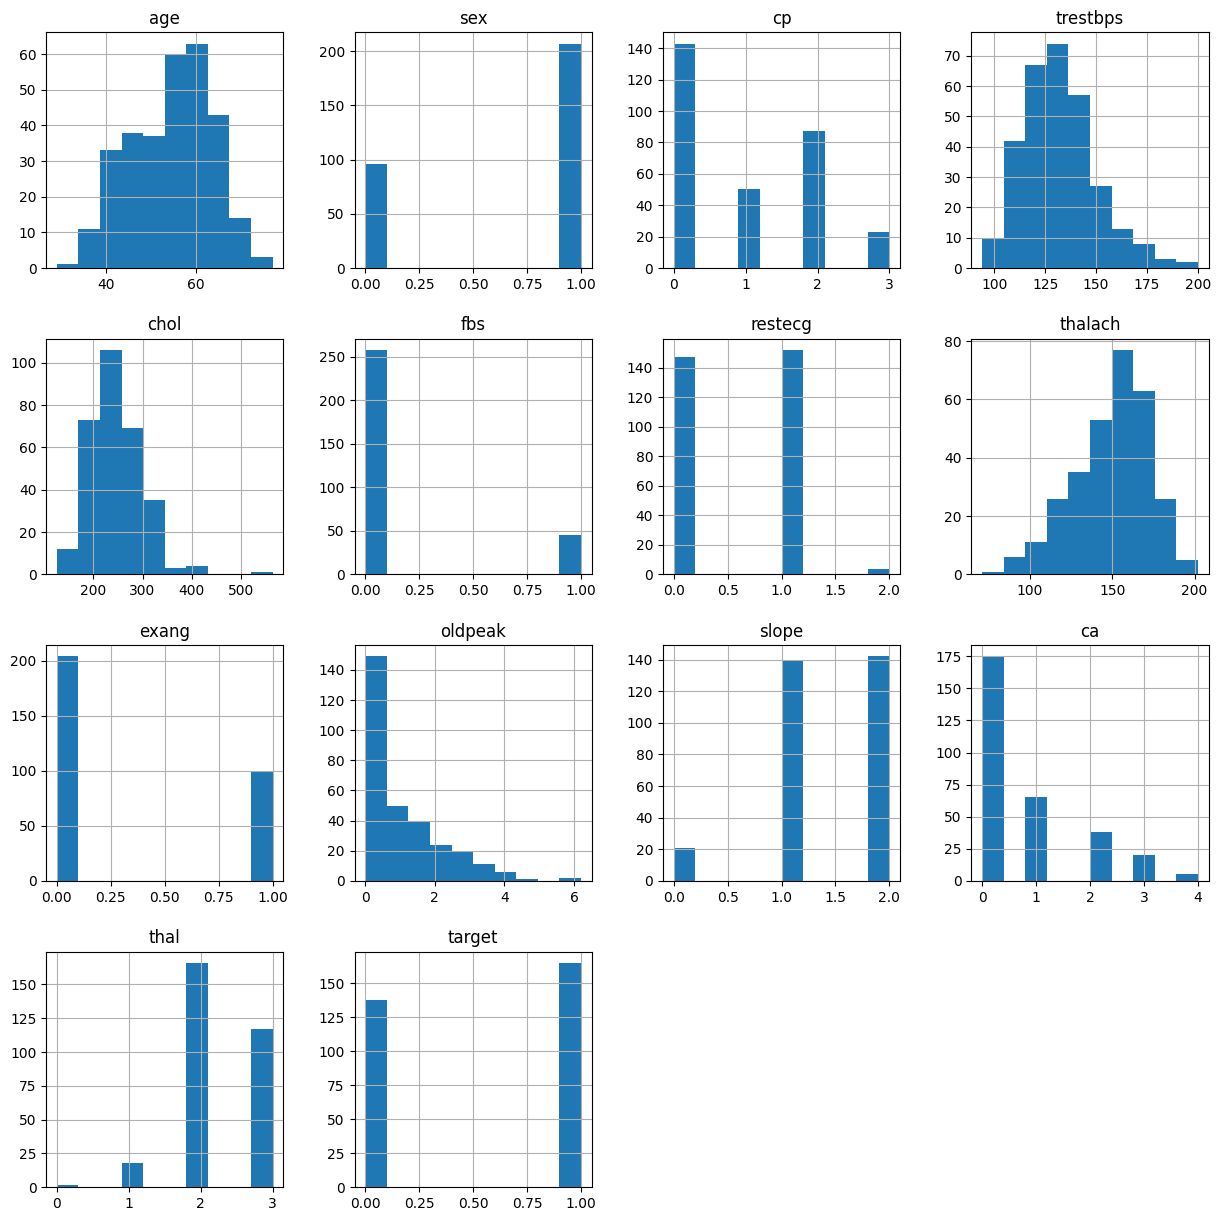

In [13]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Text(0, 0.5, 'Count')

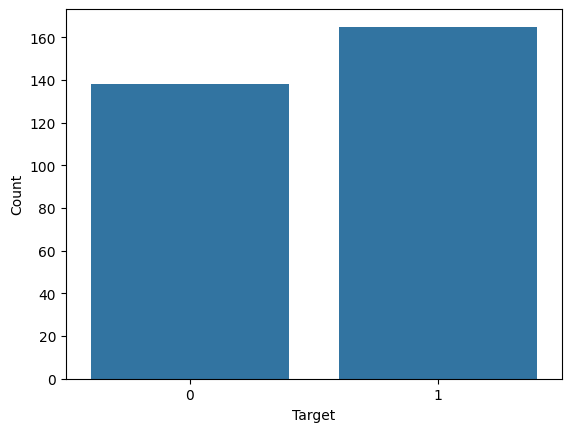

In [14]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

# **Feature Engineering**

### Feature Selection

<Axes: >

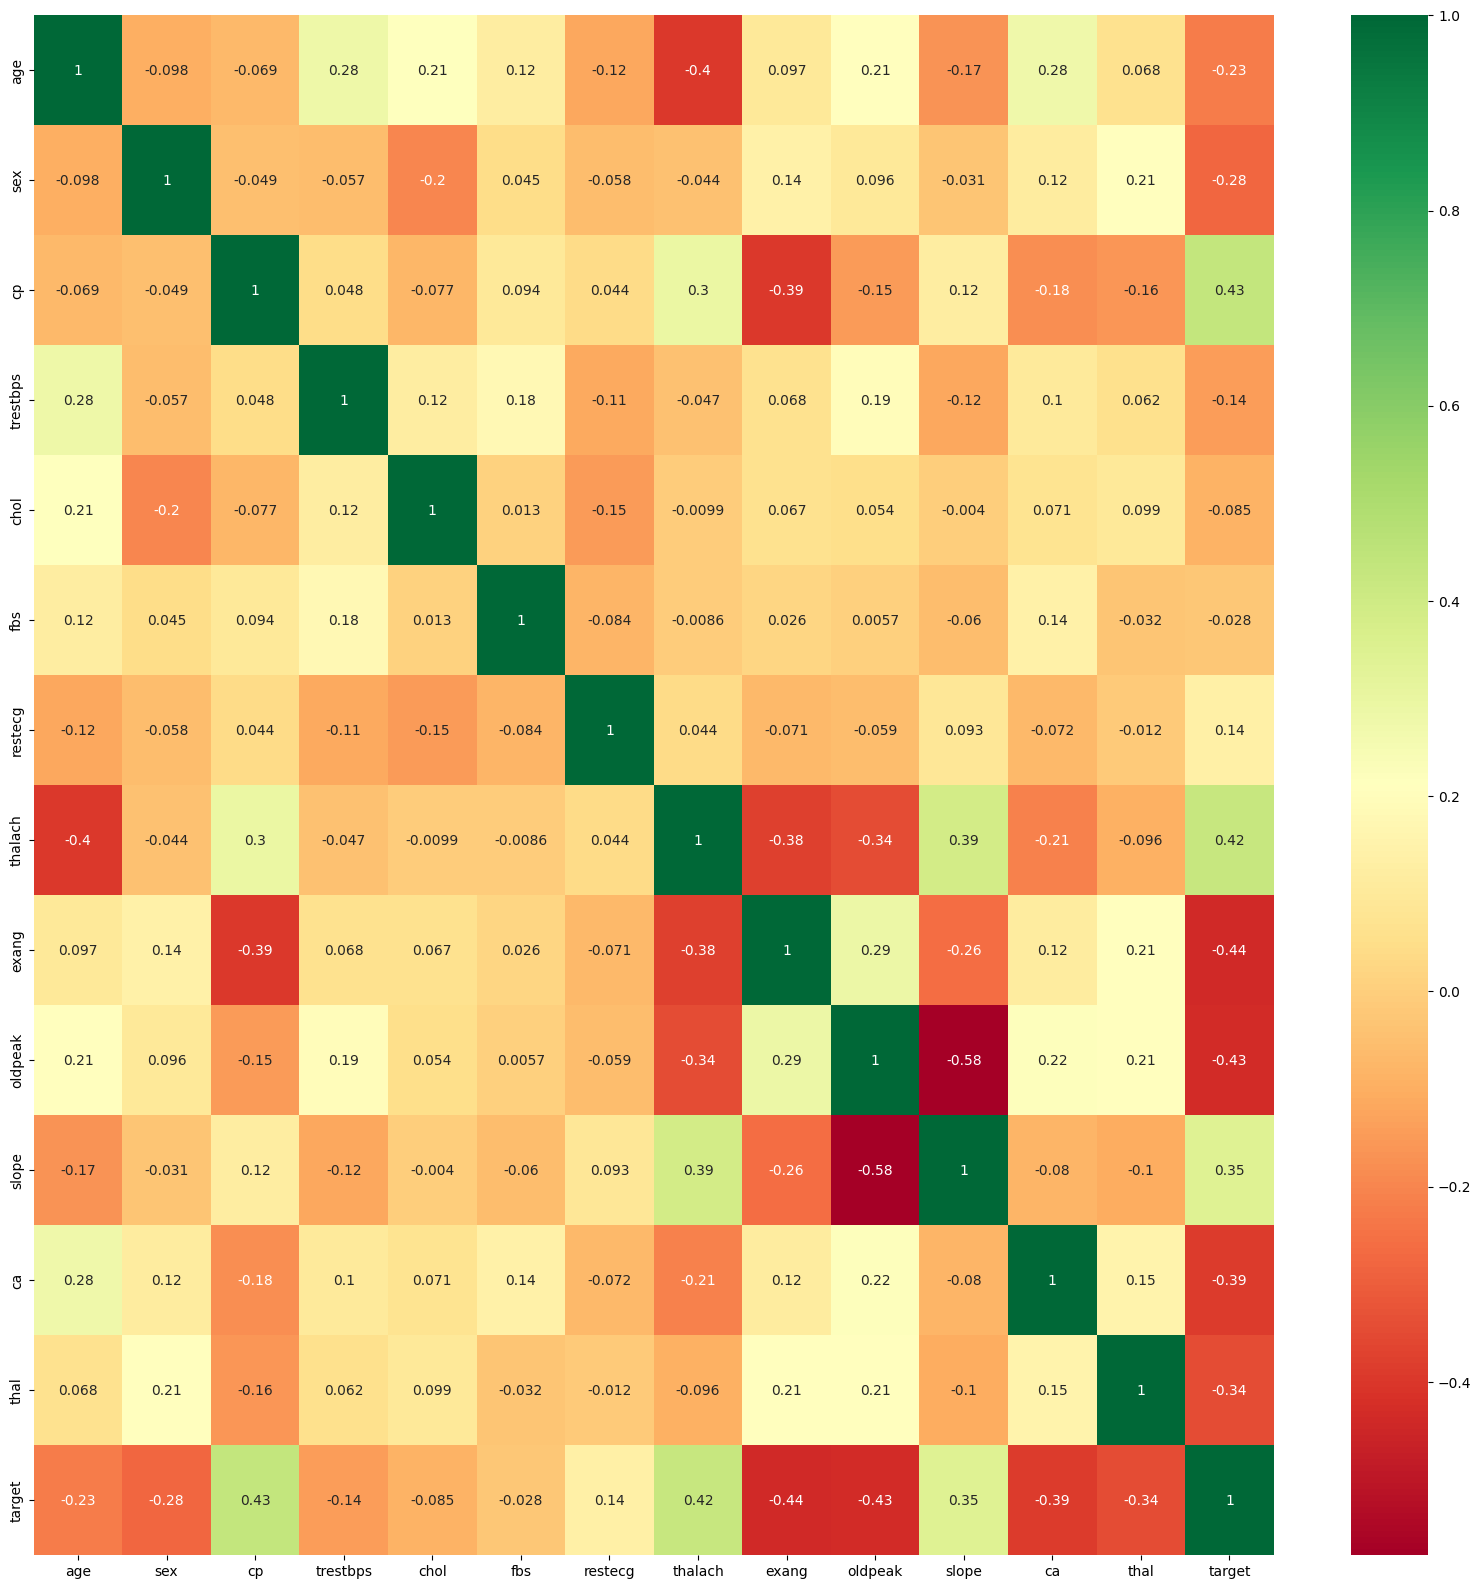

In [15]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# **Data Preprocessing**

## Handling categorical features

After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

*Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.*

In [16]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Scaling

In [17]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [19]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [20]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('target', axis=1)
y = dataset['target']

# **Model Building**

I will be experimenting with 3 algorithms:
1. KNeighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier

## KNeighbors Classifier Model

In [21]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [22]:
# Finding the best accuracy for knn algorithm using cross_val_score
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

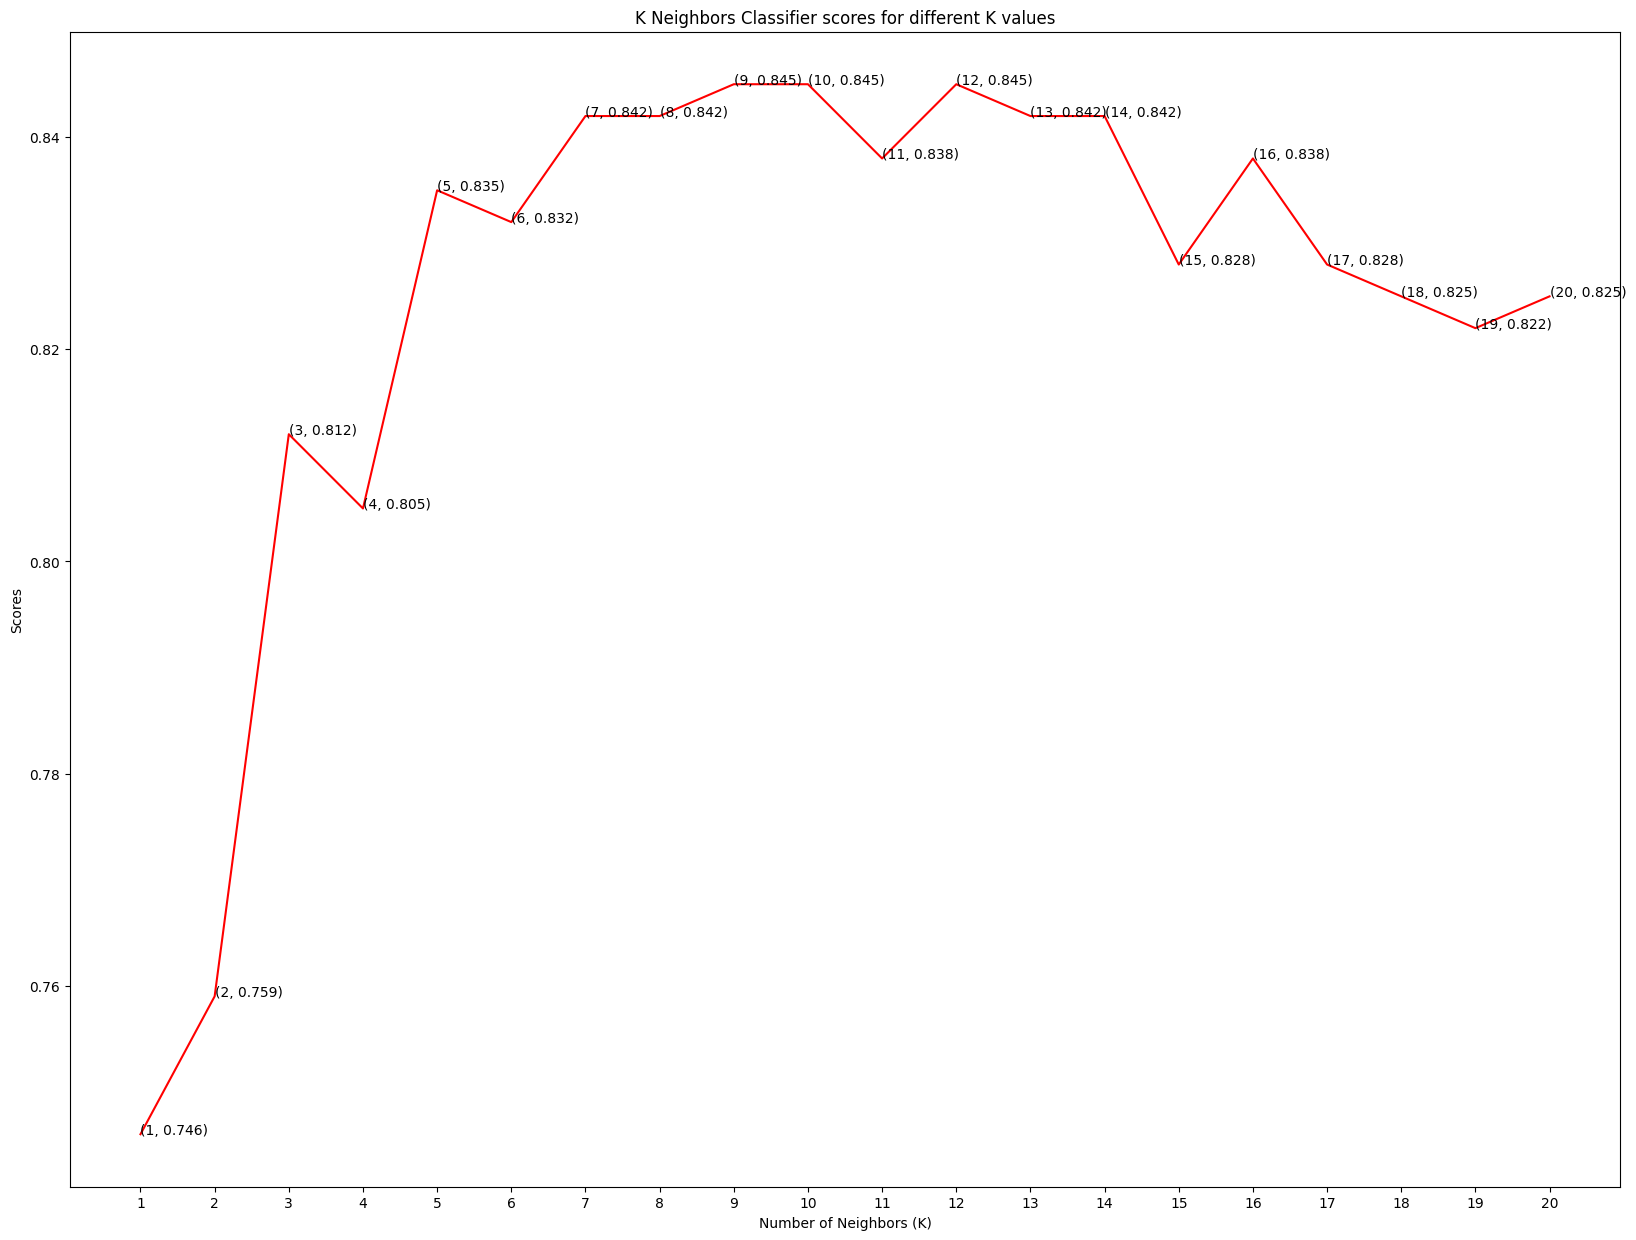

In [23]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [24]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 84.48%


## Decision Tree Classifier

In [25]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Finding the best accuracy for decision tree algorithm using cross_val_score
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

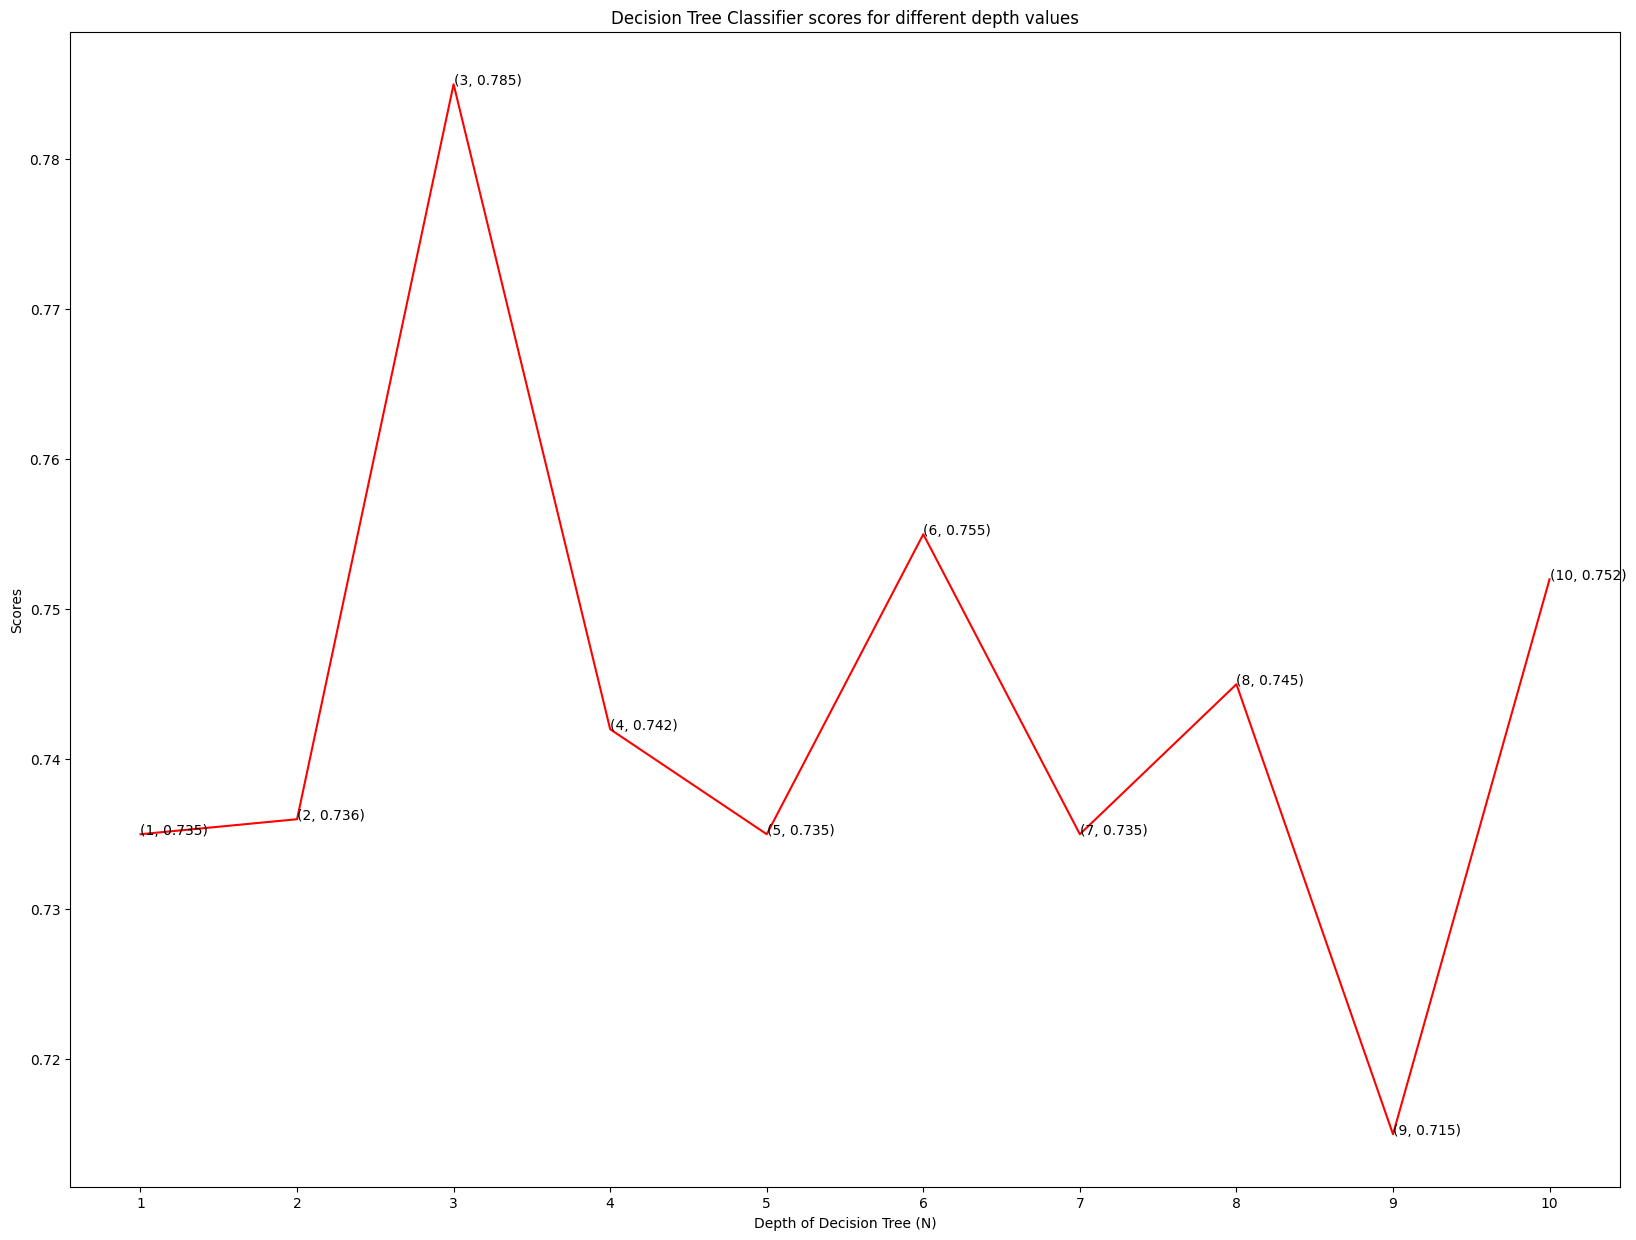

In [27]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [28]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 78.51%


## Random Forest Classifier

In [29]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Finding the best accuracy for random forest algorithm using cross_val_score
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

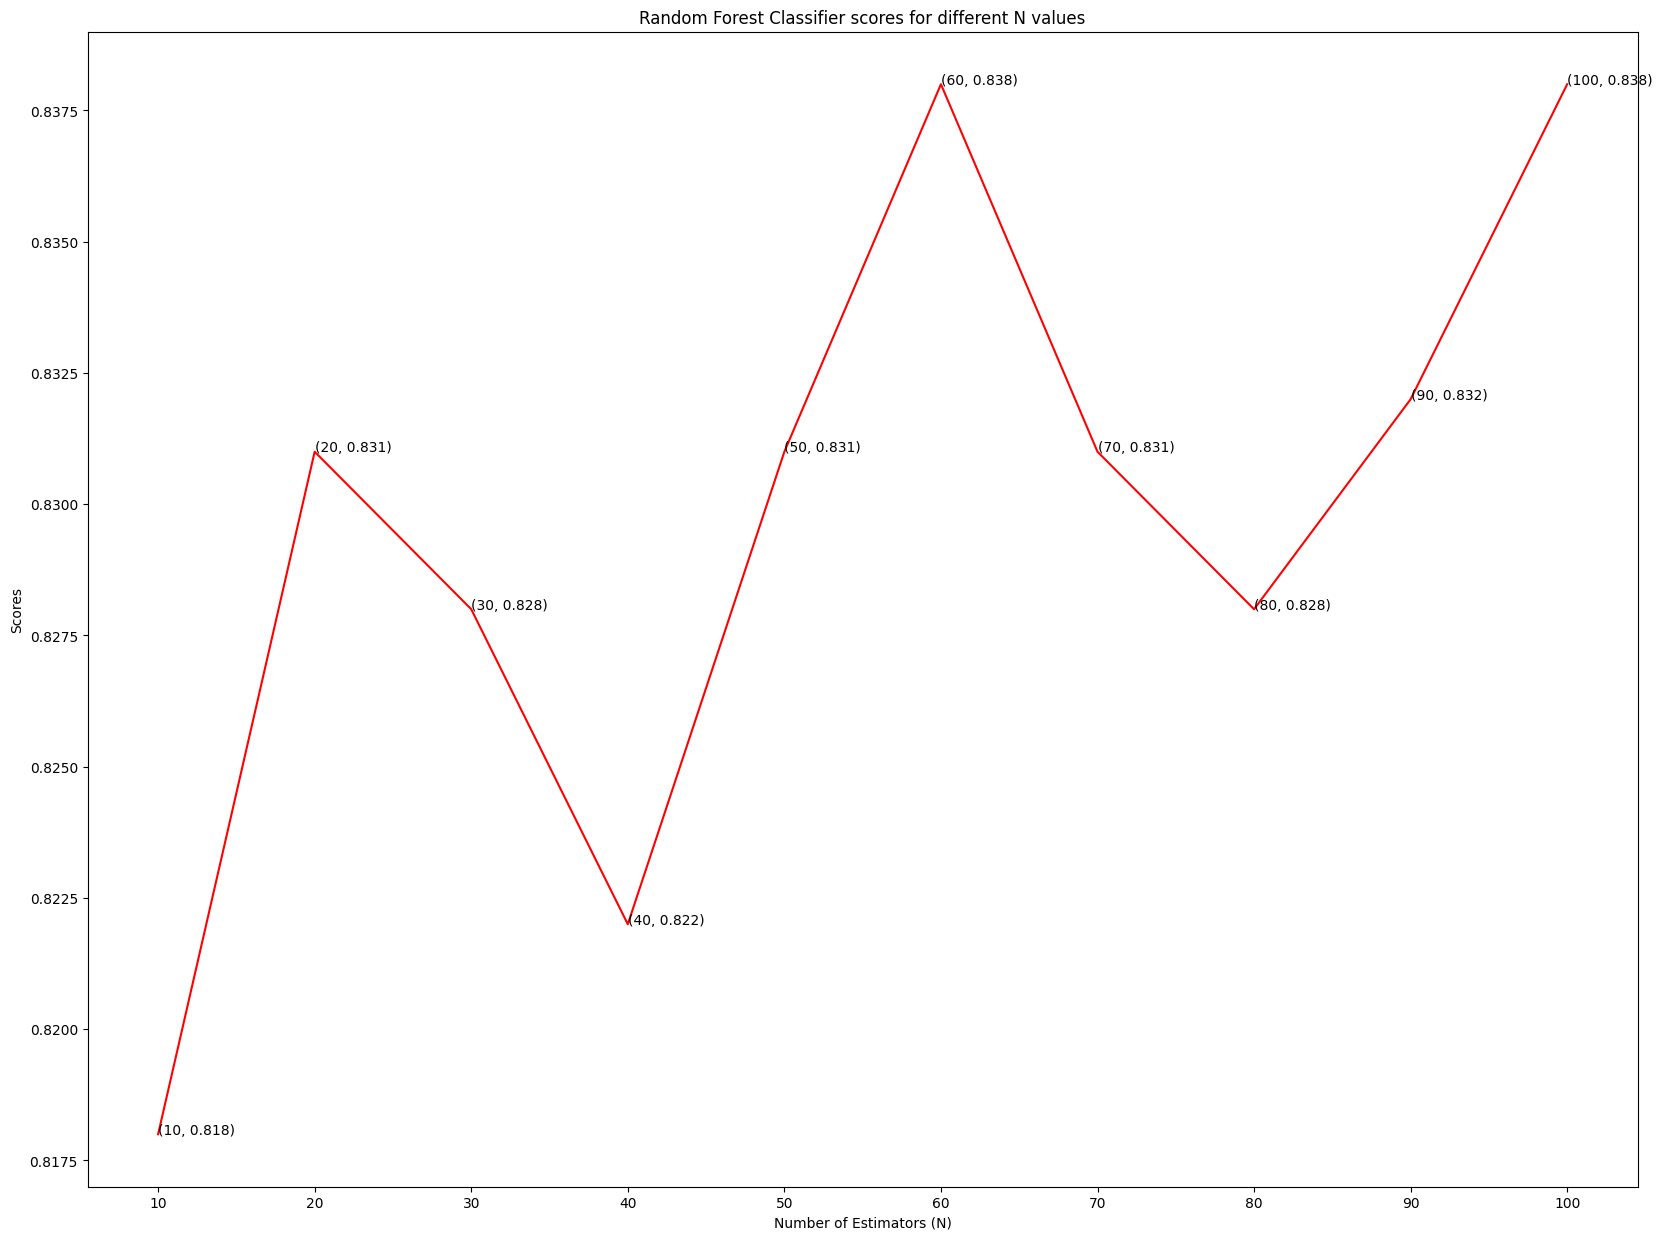

In [31]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [32]:
# Training the random forest classifier model with n value as 90
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 82.16%


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

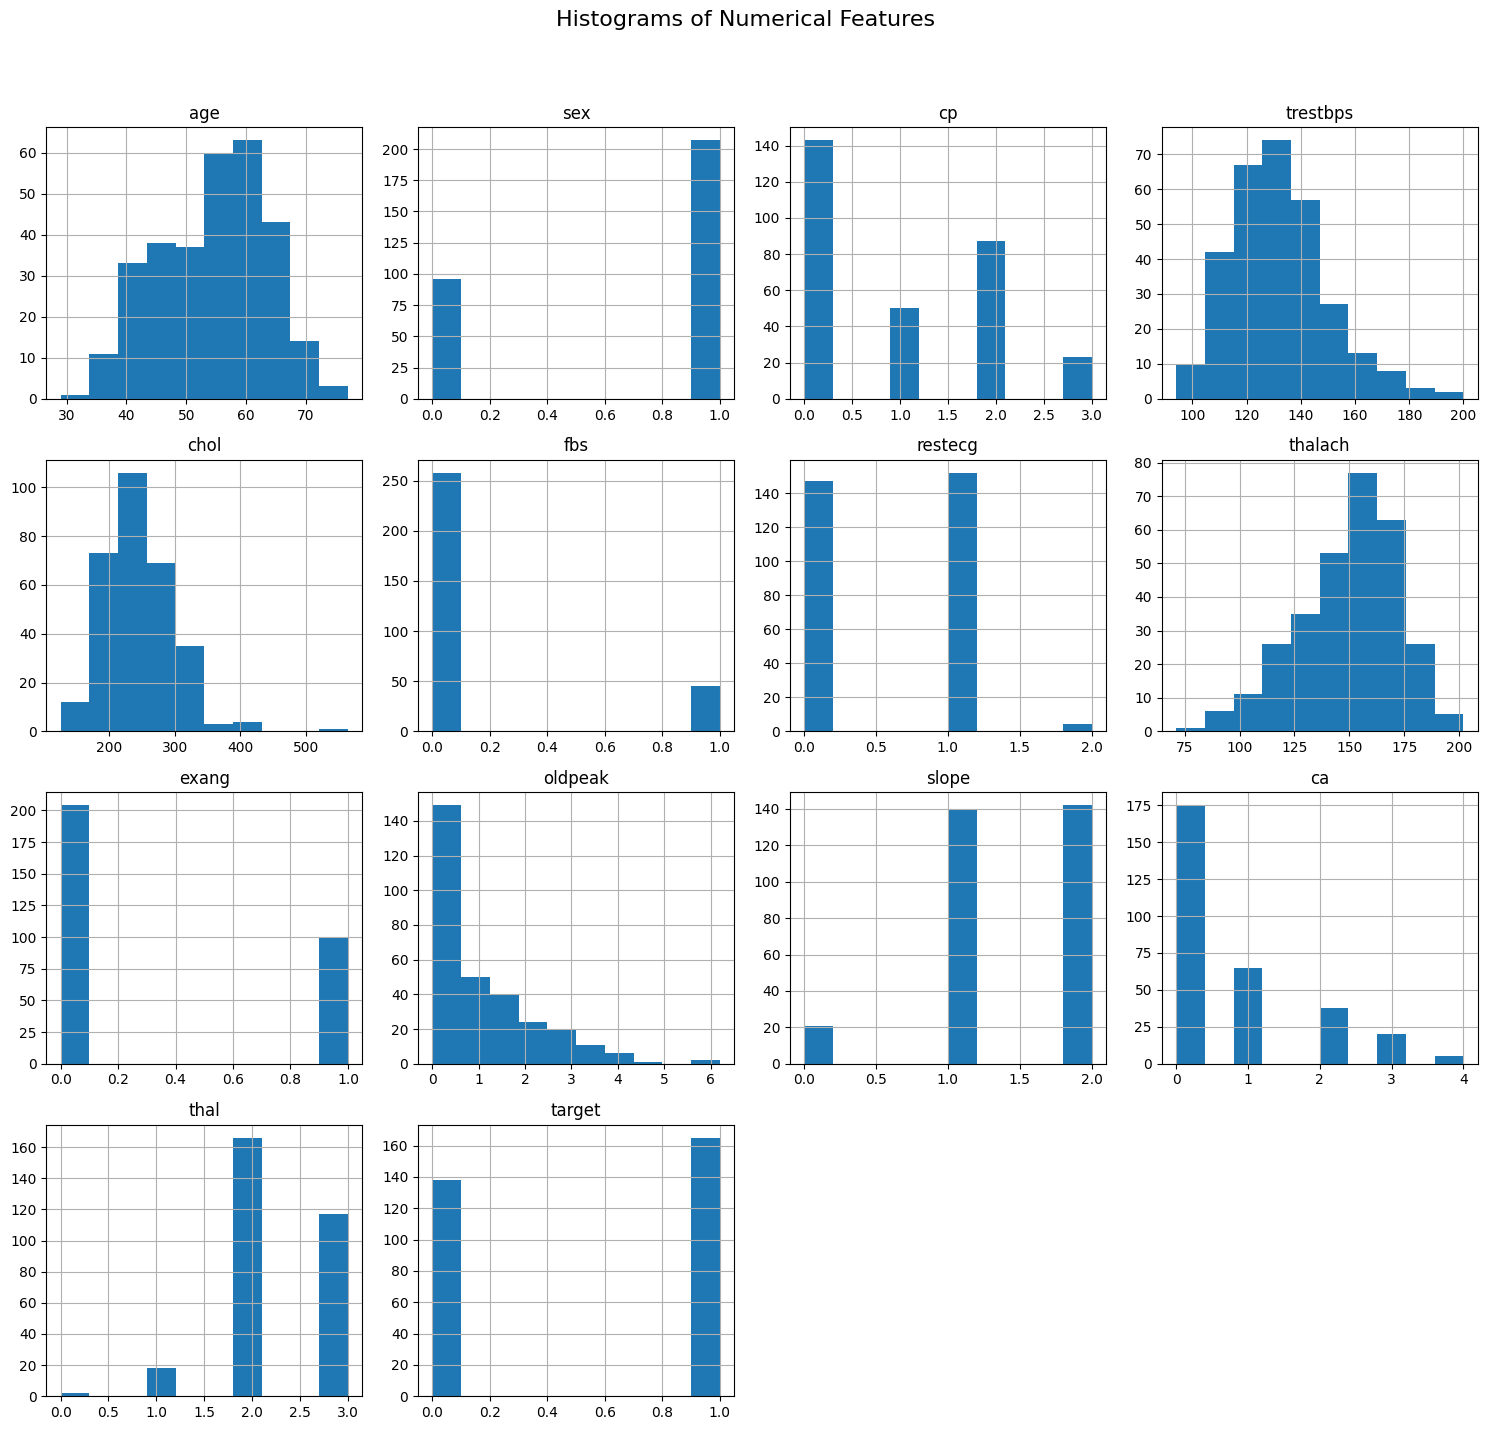

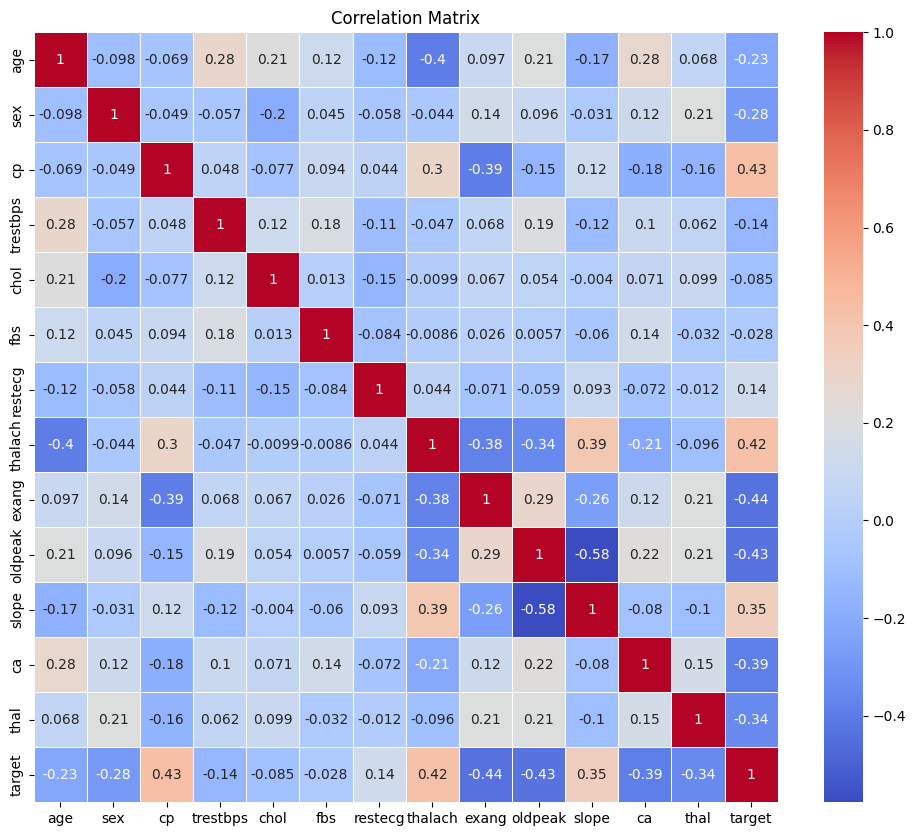

target
1    165
0    138
Name: count, dtype: int64


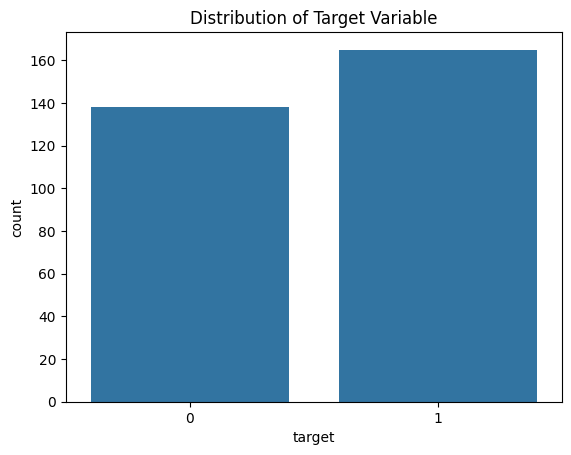

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.952197    1   3  0.763956 -0.256334    1        0  0.015443      0   
1 -1.915313    1   2 -0.092738  0.072199    0        1  1.633471      0   
2 -1.474158    0   1 -0.092738 -0.816773    0        0  0.977514      0   
3  0.180175    1   1 -0.663867 -0.198357    0        1  1.239897      0   
4  0.290464    0   0 -0.663867  2.082050    0        1  0.583939      1   

    oldpeak  slope  ca  thal  target  
0  1.087338      0   0     1       1  
1  2.122573      0   0     2       1  
2  0.310912      2   0     2       1  
3 -0.206705      2   0     2       1  
4 -0.379244      2   0     2       1  
        age  trestbps      chol   thalach   oldpeak  target  sex_1   cp_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1   True  False   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1   True  False   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1  False   True   
3  0.18

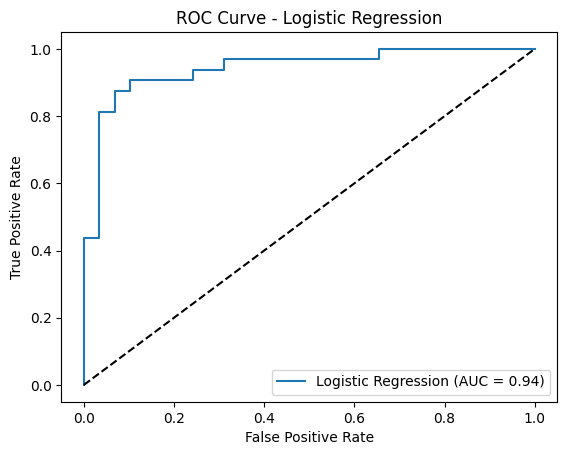

Random Forest Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

[[26  3]
 [ 6 26]]

Feature Importances (Random Forest):
      Feature  Importance
4     oldpeak    0.132279
3     thalach    0.107804
20     thal_2    0.091666
1    trestbps    0.084819
2        chol    0.083964
0         age    0.080013
21     thal_3    0.070461
12    exang_1    0.065169
15       ca_1    0.045500
14    slope_2    0.040061
7        cp_2    0.038295
5       sex_1    0.030336
16       ca_2    0.023703
13    slope_1    0.023183
10  restecg_1    0.018240
17       ca_3    0.016423
6        cp_1    0.014005
8        cp_3    0.013335
9       fbs_1    0.009258
19     thal_1    0.008238
18       ca_4    0.002622
1

In [33]:
# ----------------------------------------------------------------------
# ENHANCEMENTS TO ADD AFTER THE LAST CELL IN YOUR JUPYTER NOTEBOOK
# ----------------------------------------------------------------------

# --- Data Exploration Enhancements ---
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print(df.describe())

# Histograms
df.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Target Variable Analysis
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title("Distribution of Target Variable")
plt.show()


# --- Data Preprocessing ---
from sklearn.preprocessing import StandardScaler

# Feature Scaling (Numerical Columns)
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # List all numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

# One-Hot Encoding (Categorical Columns)
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
print(df.head())

# --- Model Building, Training, and Evaluation ---
from sklearn.model_selection import train_test_split

# Splitting Data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression
model_lr = LogisticRegression(random_state=42, solver='liblinear')  # Specify solver for compatibility
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# AUC-ROC for Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
print("AUC-ROC (Logistic Regression):", auc_lr)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Feature Importance (Random Forest)
feature_importances = model_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importances (Random Forest):")
print(importance_df)


# --- Hyperparameter Tuning (Example with Random Forest) ---
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=3,  # Use cross-validation for robust evaluation
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available cores

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Test Accuracy with Best Model:", accuracy_best)
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))




--- Descriptive Statistics ---
                age    trestbps          chol       thalach       oldpeak  \
count  3.030000e+02  303.000000  3.030000e+02  3.030000e+02  3.030000e+02   
mean   2.345026e-17    0.000000  1.172513e-17  2.345026e-17  2.345026e-17   
std    1.001654e+00    1.001654  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.797624e+00   -2.148802 -2.324160e+00 -3.439267e+00 -8.968617e-01   
25%   -7.572802e-01   -0.663867 -6.814943e-01 -7.061105e-01 -8.968617e-01   
50%    6.988599e-02   -0.092738 -1.210553e-01  1.466343e-01 -2.067053e-01   
75%    7.316189e-01    0.478391  5.456738e-01  7.151309e-01  4.834512e-01   
max    2.496240e+00    3.905165  6.140401e+00  2.289429e+00  4.451851e+00   

           target  
count  303.000000  
mean     0.544554  
std      0.498835  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

--- Histograms of Numerical Features ---


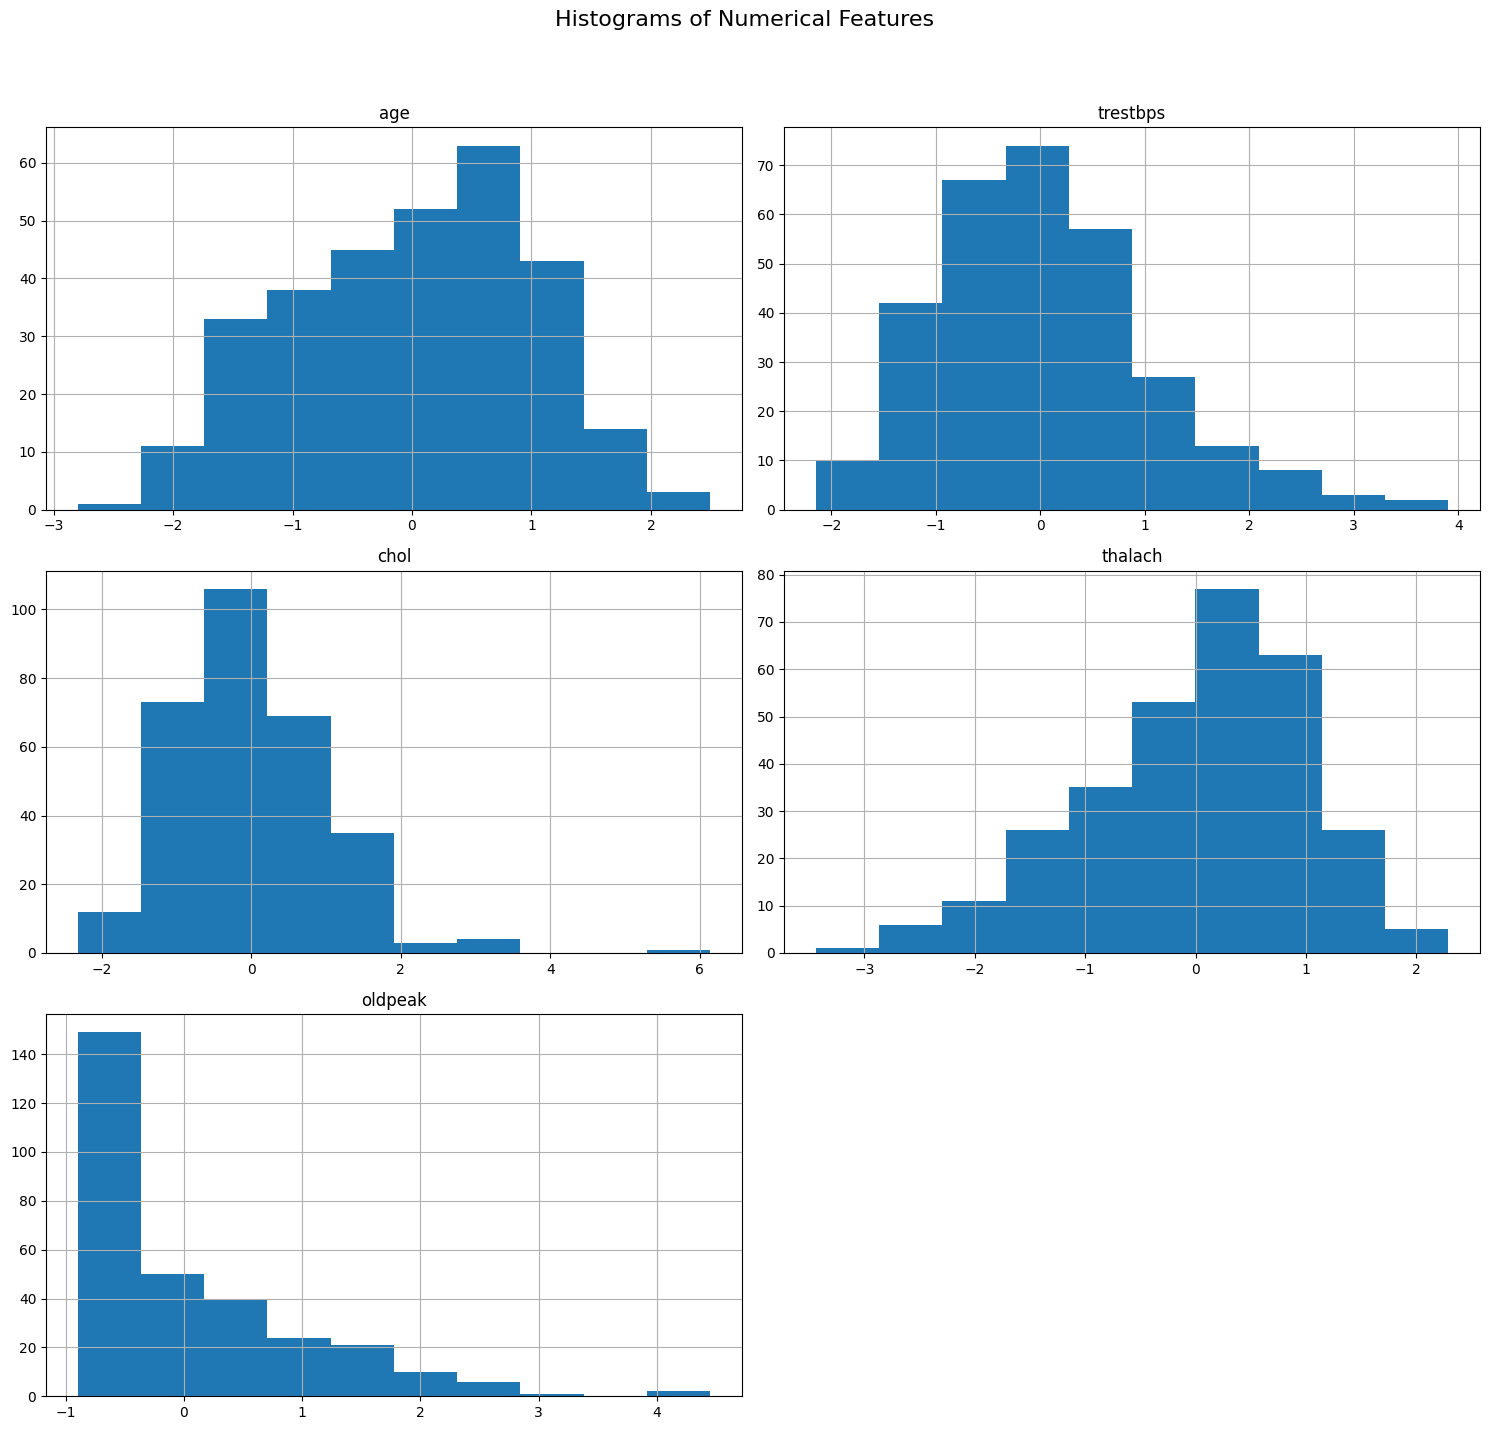


--- Correlation Matrix ---


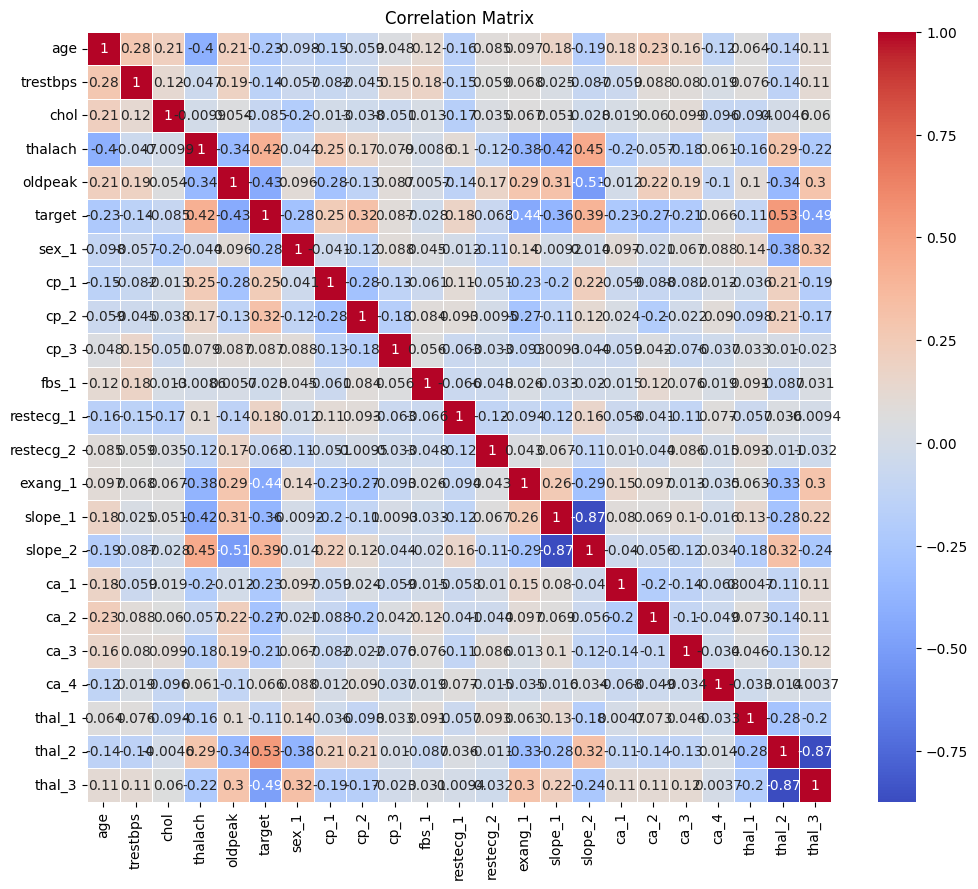


--- Target Variable Distribution ---
target
1    165
0    138
Name: count, dtype: int64


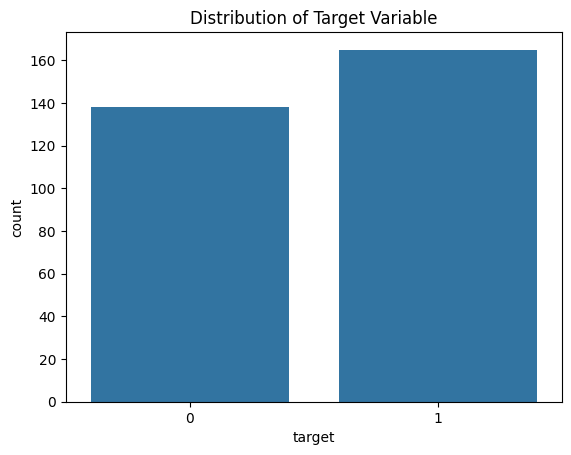


--- Feature Scaling ---
        age  trestbps      chol   thalach   oldpeak  target  sex_1   cp_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1   True  False   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1   True  False   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1  False   True   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1   True   True   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1  False  False   

    cp_2   cp_3  ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
0  False   True  ...    False    False    False  False  False  False  False   
1   True  False  ...    False    False    False  False  False  False  False   
2  False  False  ...    False    False     True  False  False  False  False   
3  False  False  ...    False    False     True  False  False  False  False   
4  False  False  ...     True    False     True  False  False  False  False   

   thal_1  thal_2  thal_3  
0    True

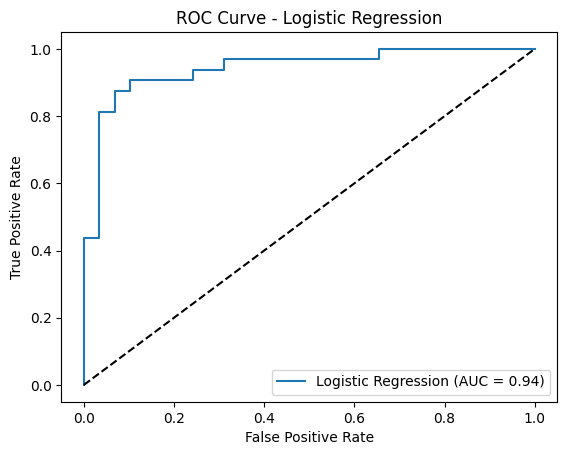


--- Random Forest ---
Random Forest Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

[[26  3]
 [ 6 26]]

--- Feature Importances (Random Forest) ---
      Feature  Importance
4     oldpeak    0.132279
3     thalach    0.107804
20     thal_2    0.091666
1    trestbps    0.084819
2        chol    0.083964
0         age    0.080013
21     thal_3    0.070461
12    exang_1    0.065169
15       ca_1    0.045500
14    slope_2    0.040061
7        cp_2    0.038295
5       sex_1    0.030336
16       ca_2    0.023703
13    slope_1    0.023183
10  restecg_1    0.018240
17       ca_3    0.016423
6        cp_1    0.014005
8        cp_3    0.013335
9       fbs_1    0.009258
19     thal_1    0.0082

In [36]:
# ----------------------------------------------------------------------
# ENHANCEMENTS TO ADD AFTER THE LAST CELL IN YOUR JUPYTER NOTEBOOK
# ----------------------------------------------------------------------

# --- 1. Data Exploration Enhancements ---
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
# Provides a statistical summary of the dataset, including mean, standard deviation, min, and max values for numerical columns.
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Histograms
# Visualizes the distribution of each numerical feature in the dataset.  Helps to understand data spread and identify potential skewness.
print("\n--- Histograms of Numerical Features ---")
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols].hist(figsize=(15, 15))  # Only plot numerical columns
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

# Correlation Matrix
# Generates a heatmap of the correlation matrix, showing the relationships between different features.
# Useful for identifying highly correlated features, which may indicate multicollinearity.
print("\n--- Correlation Matrix ---")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Target Variable Analysis
# Displays the distribution of the target variable (heart disease presence or absence).
# Crucial for understanding if the dataset is balanced or imbalanced.
print("\n--- Target Variable Distribution ---")
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title("Distribution of Target Variable")
plt.show()


# --- 2. Data Preprocessing ---
from sklearn.preprocessing import StandardScaler

# Feature Scaling (Numerical Columns)
# Scales numerical features to have zero mean and unit variance.
# Important for algorithms like SVM and k-NN, which are sensitive to feature scaling.
print("\n--- Feature Scaling ---")
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # List all numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

# One-Hot Encoding (Categorical Columns)
# Converts categorical variables into numerical format using one-hot encoding.
# 'drop_first=True' avoids multicollinearity by dropping the first category of each feature.
print("\n--- One-Hot Encoding ---")
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Ensure the columns exist and are of a suitable type for one-hot encoding
for col in categorical_cols:
    if col in df.columns:  # Check if the column exists
        df[col] = df[col].astype('category')  # Convert to category type
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")



# --- 3. Model Building, Training, and Evaluation ---
from sklearn.model_selection import train_test_split

# Splitting Data
# Splits the data into training (80%) and testing (20%) sets.
# 'random_state=42' ensures reproducibility.
print("\n--- Splitting Data into Training and Testing Sets ---")
X = df.drop('target', axis=1, errors='ignore')  #Drop target and ignore if it doesnt exits
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression
# Builds and trains a Logistic Regression model.
# 'solver='liblinear'' is specified for compatibility with smaller datasets.
print("\n--- Logistic Regression ---")
model_lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)  # Specify solver for compatibility and max_iter
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# AUC-ROC for Logistic Regression
# Calculates the Area Under the Receiver Operating Characteristic curve (AUC-ROC) for Logistic Regression.
# AUC-ROC measures the model's ability to distinguish between positive and negative classes.
print("\n--- AUC-ROC for Logistic Regression ---")
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
print("AUC-ROC (Logistic Regression):", auc_lr)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


# Random Forest
# Builds and trains a Random Forest model.
print("\n--- Random Forest ---")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Feature Importance (Random Forest)
# Extracts and displays feature importances from the Random Forest model.
# Feature importances indicate the relative contribution of each feature in the model's predictions.
print("\n--- Feature Importances (Random Forest) ---")
feature_importances = model_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)


# --- 4. Hyperparameter Tuning (Example with Random Forest) ---
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# Specifies the range of hyperparameters to be tuned for the Random Forest model.
print("\n--- Hyperparameter Tuning (GridSearchCV) ---")
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [4, 6, 8],        # Maximum depth of the trees
    'min_samples_split': [2, 4]     # Minimum number of samples required to split an internal node
}

# Instantiate GridSearchCV
# Performs an exhaustive search over the specified parameter grid using cross-validation.
# 'cv=3' uses 3-fold cross-validation.
# 'scoring='accuracy'' evaluates models based on accuracy.
# 'n_jobs=-1' uses all available cores for faster computation.
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=3,  # Use cross-validation for robust evaluation
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available cores

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best estimator
# Extracts the best model found by GridSearchCV.
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
# Evaluates the performance of the best model on the test set.
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Test Accuracy with Best Model:", accuracy_best)
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
